In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler #표준화 패키지 라이브러리
from sklearn.decomposition import PCA   #주요인자탐지
from mpl_toolkits.mplot3d import Axes3D  #3차원 그래프 라이브러리
import warnings
warnings.filterwarnings('ignore')

데이터 확인 및 기본 데이터 분석
-> 통계량 확인, 데이터 추출, 그룹화

In [2]:
data = sns.load_dataset('exercise')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
Unnamed: 0    90 non-null int64
id            90 non-null int64
diet          90 non-null category
pulse         90 non-null int64
time          90 non-null category
kind          90 non-null category
dtypes: category(3), int64(3)
memory usage: 2.6 KB


In [3]:
data.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [4]:
data.describe().round(2)    #기초 통계량 확인

,Unnamed: 0,id,pulse
count,90.00,90.0,90.00
mean,44.50,15.5,99.70
std,26.12,8.7,14.86
min,0.00,1.0,80.00
25%,22.25,8.0,90.25
50%,44.50,15.5,96.00
75%,66.75,23.0,103.00
max,89.00,30.0,150.00


In [5]:
data.groupby(data.time).mean().round(2)   #time으로 그룹화한 칼럼들의 평균

,Unnamed: 0,id,pulse
time,,,
1 min,43.5,15.5,93.13
15 min,44.5,15.5,101.53
30 min,45.5,15.5,104.43


In [6]:
data.groupby(data.diet).mean().round(2)   #diet로 그룹화한 칼럼들의 평균

,Unnamed: 0,id,pulse
diet,,,
no fat,52.0,18.0,103.44
low fat,37.0,13.0,95.96


In [7]:
data.groupby(data.kind).mean().round(2)    #kind로 그룹화한 칼럼들의 평균

,Unnamed: 0,id,pulse
kind,,,
rest,14.5,5.5,90.83
walking,44.5,15.5,95.20
running,74.5,25.5,113.07


In [8]:
data.loc[data.diet == 'low fat'][data.kind == 'rest'][data.pulse >= 90]   #diet=low fat, kind = rest이고 pulse가 90이상인 항목 추출

,Unnamed: 0,id,diet,pulse,time,kind
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
5,5,2,low fat,93,30 min,rest
6,6,3,low fat,97,1 min,rest
7,7,3,low fat,97,15 min,rest
8,8,3,low fat,94,30 min,rest
12,12,5,low fat,91,1 min,rest
13,13,5,low fat,92,15 min,rest
14,14,5,low fat,91,30 min,rest


In [9]:
#diet가 low fat인 항목의 pulse 평균, no fat인 항목의 pulse 평균
LOW_FAT = data.query('diet == "low fat"')['pulse'].mean()
NO_FAT = data.query('diet == "no fat"')['pulse'].mean()
print(LOW_FAT, NO_FAT)

95.95555555555555 103.44444444444444


데이터 시각화

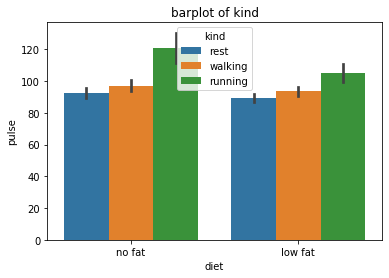

In [10]:
sns.barplot(data = data, hue = "kind", x = "diet", y = "pulse")
plt.title("barplot of kind")
plt.show()

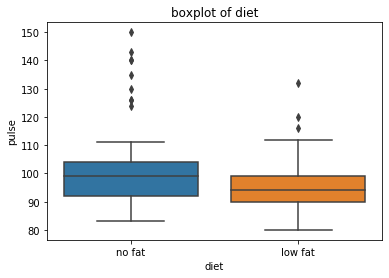

In [11]:
sns.boxplot(data = data, x = 'diet', y = 'pulse')
plt.title('boxplot of diet')
plt.show()

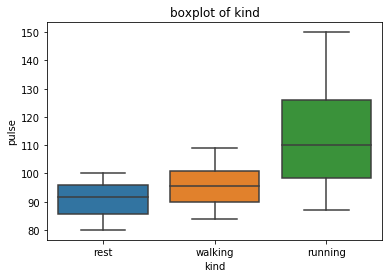

In [12]:
sns.boxplot(data = data, x = 'kind', y = 'pulse')
plt.title('boxplot of kind')
plt.show()

데이터 전처리
1. 결측치 확인
2. time column 값 변경 : 0 = '1min', 1 = '15min', 2 = '30min'

In [13]:
data.isnull().sum()

Unnamed: 0    0
id            0
diet          0
pulse         0
time          0
kind          0
dtype: int64

In [6]:
data.time = pd.Categorical(data.time)
data.diet = pd.Categorical(data.diet)
data['time'] = data.time.cat.codes.astype(int)
data['diet'] = data.diet.cat.codes.astype(int)
data.head(10)

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,1,85,0,rest
1,1,1,1,85,1,rest
2,2,1,1,88,2,rest
3,3,2,1,90,0,rest
4,4,2,1,92,1,rest
5,5,2,1,93,2,rest
6,6,3,1,97,0,rest
7,7,3,1,97,1,rest
8,8,3,1,94,2,rest
9,9,4,1,80,0,rest


PCA 주요인자 탐지 적용
1. 정규화 : kind를 제외한 나머지 feature를 평균 0, 표준편차 1을 기준으로 정규화
2. PCA 적용 : 5개의 feature를 2개의 주성분으로 차원 축소
3. 시각화

In [85]:
x = data.drop(['kind'], axis = 1)
y = data['kind'].values

x = StandardScaler().fit_transform(x)
features = ['Unnamed:0', 'id', 'diet', 'pulse', 'time']
data_scaled = pd.DataFrame(x , columns = features)
data_scaled['target'] = data.kind
data_scaled.head(10)

,Unnamed:0,id,diet,pulse,time,target
0,-1.712912,-1.675247,1.0,-0.994877,-1.224745,rest
1,-1.674419,-1.675247,1.0,-0.994877,0.000000,rest
2,-1.635927,-1.675247,1.0,-0.791841,1.224745,rest
3,-1.597434,-1.559712,1.0,-0.656484,-1.224745,rest
4,-1.558942,-1.559712,1.0,-0.521126,0.000000,rest
5,-1.520450,-1.559712,1.0,-0.453447,1.224745,rest
6,-1.481957,-1.444178,1.0,-0.182733,-1.224745,rest
7,-1.443465,-1.444178,1.0,-0.182733,0.000000,rest
8,-1.404972,-1.444178,1.0,-0.385769,1.224745,rest
9,-1.366480,-1.328644,1.0,-1.333271,-1.224745,rest


In [86]:
model = PCA(n_components = 2)
model_components = model.fit_transform(x)
df = pd.DataFrame(data = model_components, 
                  columns = ['principal component 1', 'principal component 2'])
result = pd.concat([df, data_scaled[['target']]], axis = 1)
print(model.explained_variance_ratio_)   #pca 주성분 설명력

[0.54804072 0.21760297]


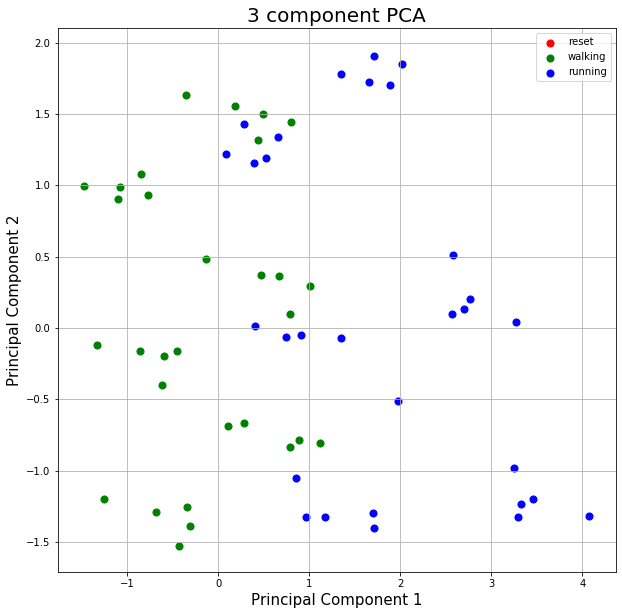

In [89]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

kinds = ['reset', 'walking', 'running']
colors = ['r','g','b']

for target, color in zip(kinds, colors):
    indicesToKeep = result['target'] == target
    ax.scatter(result.loc[indicesToKeep, 'principal component 1'],
              result.loc[indicesToKeep, 'principal component 2'],
               c = color, s = 50)
ax.legend(kinds)
ax.grid()
plt.show()